In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

![img](https://lh5.googleusercontent.com/8mM4oTbYwN3xcnkE8khByIGm_2g6GIBVjhDyvmmUbrR8WtC3MMCekSxxbWpGXMvxZvskz7Bktpy452o-V1qIdJqtr5EOkqByTZ9xBK6e_zivTiz1cQcwB185y_DlsbWD-Q=w1280)

In [65]:
s_earth = 1361.0 # W/m^2
r_earth = 6378.137 # km

In [86]:
def ESI1(s, r):
    return 1 - np.sqrt(0.5 * (((s_earth * (s-1))/(s_earth * (s+1))**2 + (((r_earth * (r-1)/(r_earth * (r+1))**2))))))

def ESI2(s, r):
    return 1 - np.sqrt(0.5 * ( ((s-s_earth)/(s+s_earth))**2 + ((r-r_earth)/(r_earth+r))**2 ))

In [101]:
s = np.linspace(10e-4, 10e+2, int(10e+3)) 
r = np.linspace(10e-3, 10e+1, int(10e+3))
ss, rr = np.meshgrid(s, r)
esi = ESI2(ss * s_earth, rr * r_earth)

Import NASA Exoplanet Data:

In [188]:
csv = pd.read_csv('exoplanet_q1.csv')
data = csv[["pl_rade", "pl_insol"]].dropna()
svals = np.array(data["pl_insol"])[:1500]
rvals = np.array(data["pl_rade"])[:1500]

Import HEC Data:

In [194]:
csv2 = pd.read_csv('hec.csv')
hec_svals = csv2['pl_insol']
hec_rvals = csv2['pl_rade']

In [189]:
lvls = np.linspace(0, 1, 9)

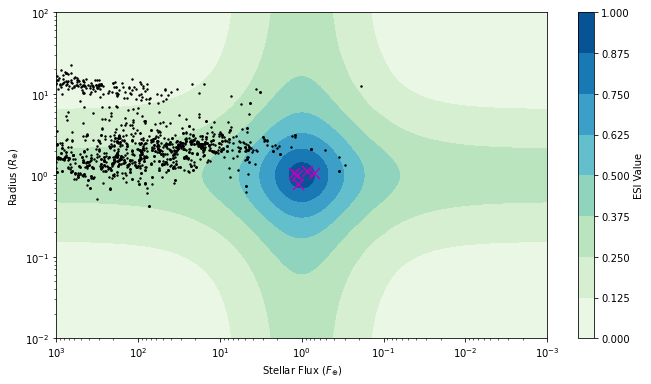

In [202]:
fig, ax = plt.subplots(figsize=(11, 6))
plt.yscale('log')
plt.xscale('log')
plt.xlim(10e-4, 10e2)
plt.ylim(10e-3, 10e1)
plt.xlabel(r'Stellar Flux $(F_{\oplus})$')
plt.ylabel(r'Radius $(R_{\oplus})$')
plt.gca().invert_xaxis()
cont = ax.contourf(ss, rr, esi, cmap='GnBu', levels=lvls)
ax.scatter(svals, rvals, s=2, c='k')
ax.scatter(hec_svals, hec_rvals, s=120, marker='x', c='m')
cbar = plt.colorbar(cont, label='ESI Value')
plt.show()